#Logistic Regression

<br/>

#### Description of model:

* The logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables
* There are three main types of logistic regression: binary, multinomial and ordinal



<br/>

#### Why it was chosen for analysis:
* Logistic regression is easier to implement, interpret, and very efficient to train
* Logistic Regression is an easily interpretable classification technique that gives the probability of an event occurring, not just the predicted classification
* Out Dataset's Target variable has only two values (0,1),So that we used binary logistic regression
<br/>

#### Accuracy 
* before hyperparameter tuning =>  73.58 %
* after hyperparameter tuning => 74.75 %

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 
import pickle

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:

import pandas as pd

url = 'https://drive.google.com/file/d/1jIQw8krbUHOarMutqLjJZ-ZBZyyFZ6yP/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

df.head(2)

lead_time  is_same_room  previous_cancellations  total_of_special_requests  \
0   0.009539             1                       0                          0   
1   0.139905             1                       0                          1   

   booking_changes  is_cancelled  
0                0             0  
1                0             1

In [ ]:
df.booking_changes.unique()

array([ 0,  1,  2,  4,  7,  3, 20,  5,  8,  6,  9, 13, 14, 15, 17, 11, 21,
       10, 12, 18, 16])

In [ ]:
x = df.drop('is_cancelled',axis = 1)
y = df.is_cancelled

## **Spliting Training data and testing data (70:30)**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 ,random_state=4)

## **Creating Model**

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
model.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred = model.predict(x_test)

##**Check the accuracy score**

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

73.59552922391697

## **Compare the train-set and test-set accuracy**

In [ ]:
print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 0.7358
Test set score: 0.7360


The training-set accuracy score is 0.7471 while the test-set accuracy to be 0.7471. These two values are quite comparable. So, there is no question of overfitting.

# **Confusion matrix**

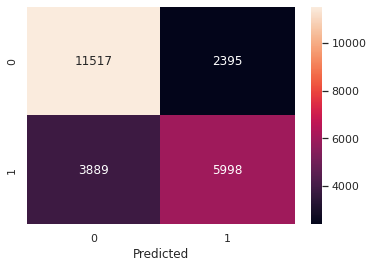

In [ ]:
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)),annot = True , fmt ="g")
plt.xlabel("Predicted")
plt.show("Actual")
plt.show()

# **Classification Report**
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

In [ ]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79     46228
           1       0.72      0.61      0.66     33102

    accuracy                           0.74     79330
   macro avg       0.73      0.72      0.72     79330
weighted avg       0.73      0.74      0.73     79330



# **k-Fold Cross Validation**

In [ ]:
# Applying 5-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.73503196 0.72888529 0.73275707 0.74104088 0.7360886 ]
Average cross-validation score: 0.7348


# **Hyperparameter Optimization using GridSearch CV**

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'penalty':['none', 'elasticnet', 'l1', 'l2']}, 
              {'C':[0.001,0.01,1,10,100]},
              {'solver':['liblinear','newton-cg', 'lbfgs', 'sag',  'saga']}]
grid_search = GridSearchCV(estimator = model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['none', 'elasticnet', 'l1', 'l2']},
                         {'C': [0.001, 0.01, 1, 10, 100]},
                         {'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                     'saga']}],
             scoring='accuracy')

In [ ]:
# Best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
# Print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
# Print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.7479


Parameters that give the best results : 

 {'C': 0.01}


Estimator that was chosen by the search : 

 LogisticRegression(C=0.01, random_state=0, solver='liblinear')


# **FINAL MODEL IMPLEMENTATION & EVALUATION**

In [22]:
print('Training set score: {:.4f}'.format(grid_search.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(grid_search.score(x_test, y_test)))


Training set score: 0.7475
Test set score: 0.7450


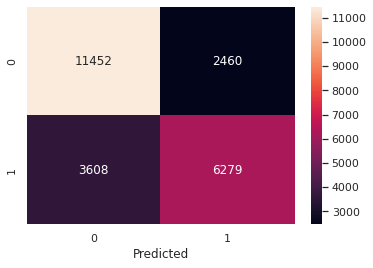

In [23]:
sns.heatmap(confusion_matrix(y_test, grid_search.predict(x_test)),annot = True , fmt ="g")
plt.xlabel("Predicted")
plt.show("Actual")
plt.show()

In [ ]:
print(classification_report(y, grid_search.predict(x)))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79     46228
           1       0.72      0.64      0.68     33102

    accuracy                           0.75     79330
   macro avg       0.74      0.73      0.73     79330
weighted avg       0.74      0.75      0.74     79330



In [ ]:
# Saving model to disk
pickle.dump(grid_search, open('/content/drive/MyDrive/FDM_MINI_PROJECT/Models/logistic.pkl','wb'))



In [ ]:
# Loading model to compare the results
model = pickle.load(open('/content/drive/MyDrive/FDM_MINI_PROJECT/Models/logistic.pkl','rb'))
print(model.predict([[0.139905,1,0,1,0]]))

model2 = pickle.load(open('/content/drive/MyDrive/FDM_MINI_PROJECT/Models/rfc_model.pkl','rb'))
print(model2.predict([[0.139905,1,0,1,0]]))

model3 = pickle.load(open('/content/drive/MyDrive/FDM_MINI_PROJECT/Models/naive_mdl.pkl','rb'))
print(model3.predict([[0.139905,1,0,1,0]]))


NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
